In [8]:
import sympy
from sympy import Matrix, Rational, sqrt, symbols, zeros
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

# Linear algebra

## Session 07: 

## Gerhard Jäger

### June 17, 2022

## Rank of a matrix

The **rank** of a matrix is the number of dimensions covered by its column space.



## examples of an invertable and a non-invertable matrix in 3d

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}\\[1em]
A^{-1} &=
\begin{bmatrix}
\frac{5}{63} & - \frac{22}{63} & \frac{1}{9}\\- \frac{11}{63} & - \frac{2}{63} & \frac{1}{18}\\\frac{1}{9} & \frac{1}{9} & \frac{1}{18}
\end{bmatrix}\\[1em]
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
B^{-1}& \mbox{ is undefined}
\end{aligned}
$$

<IPython.core.display.Javascript object>


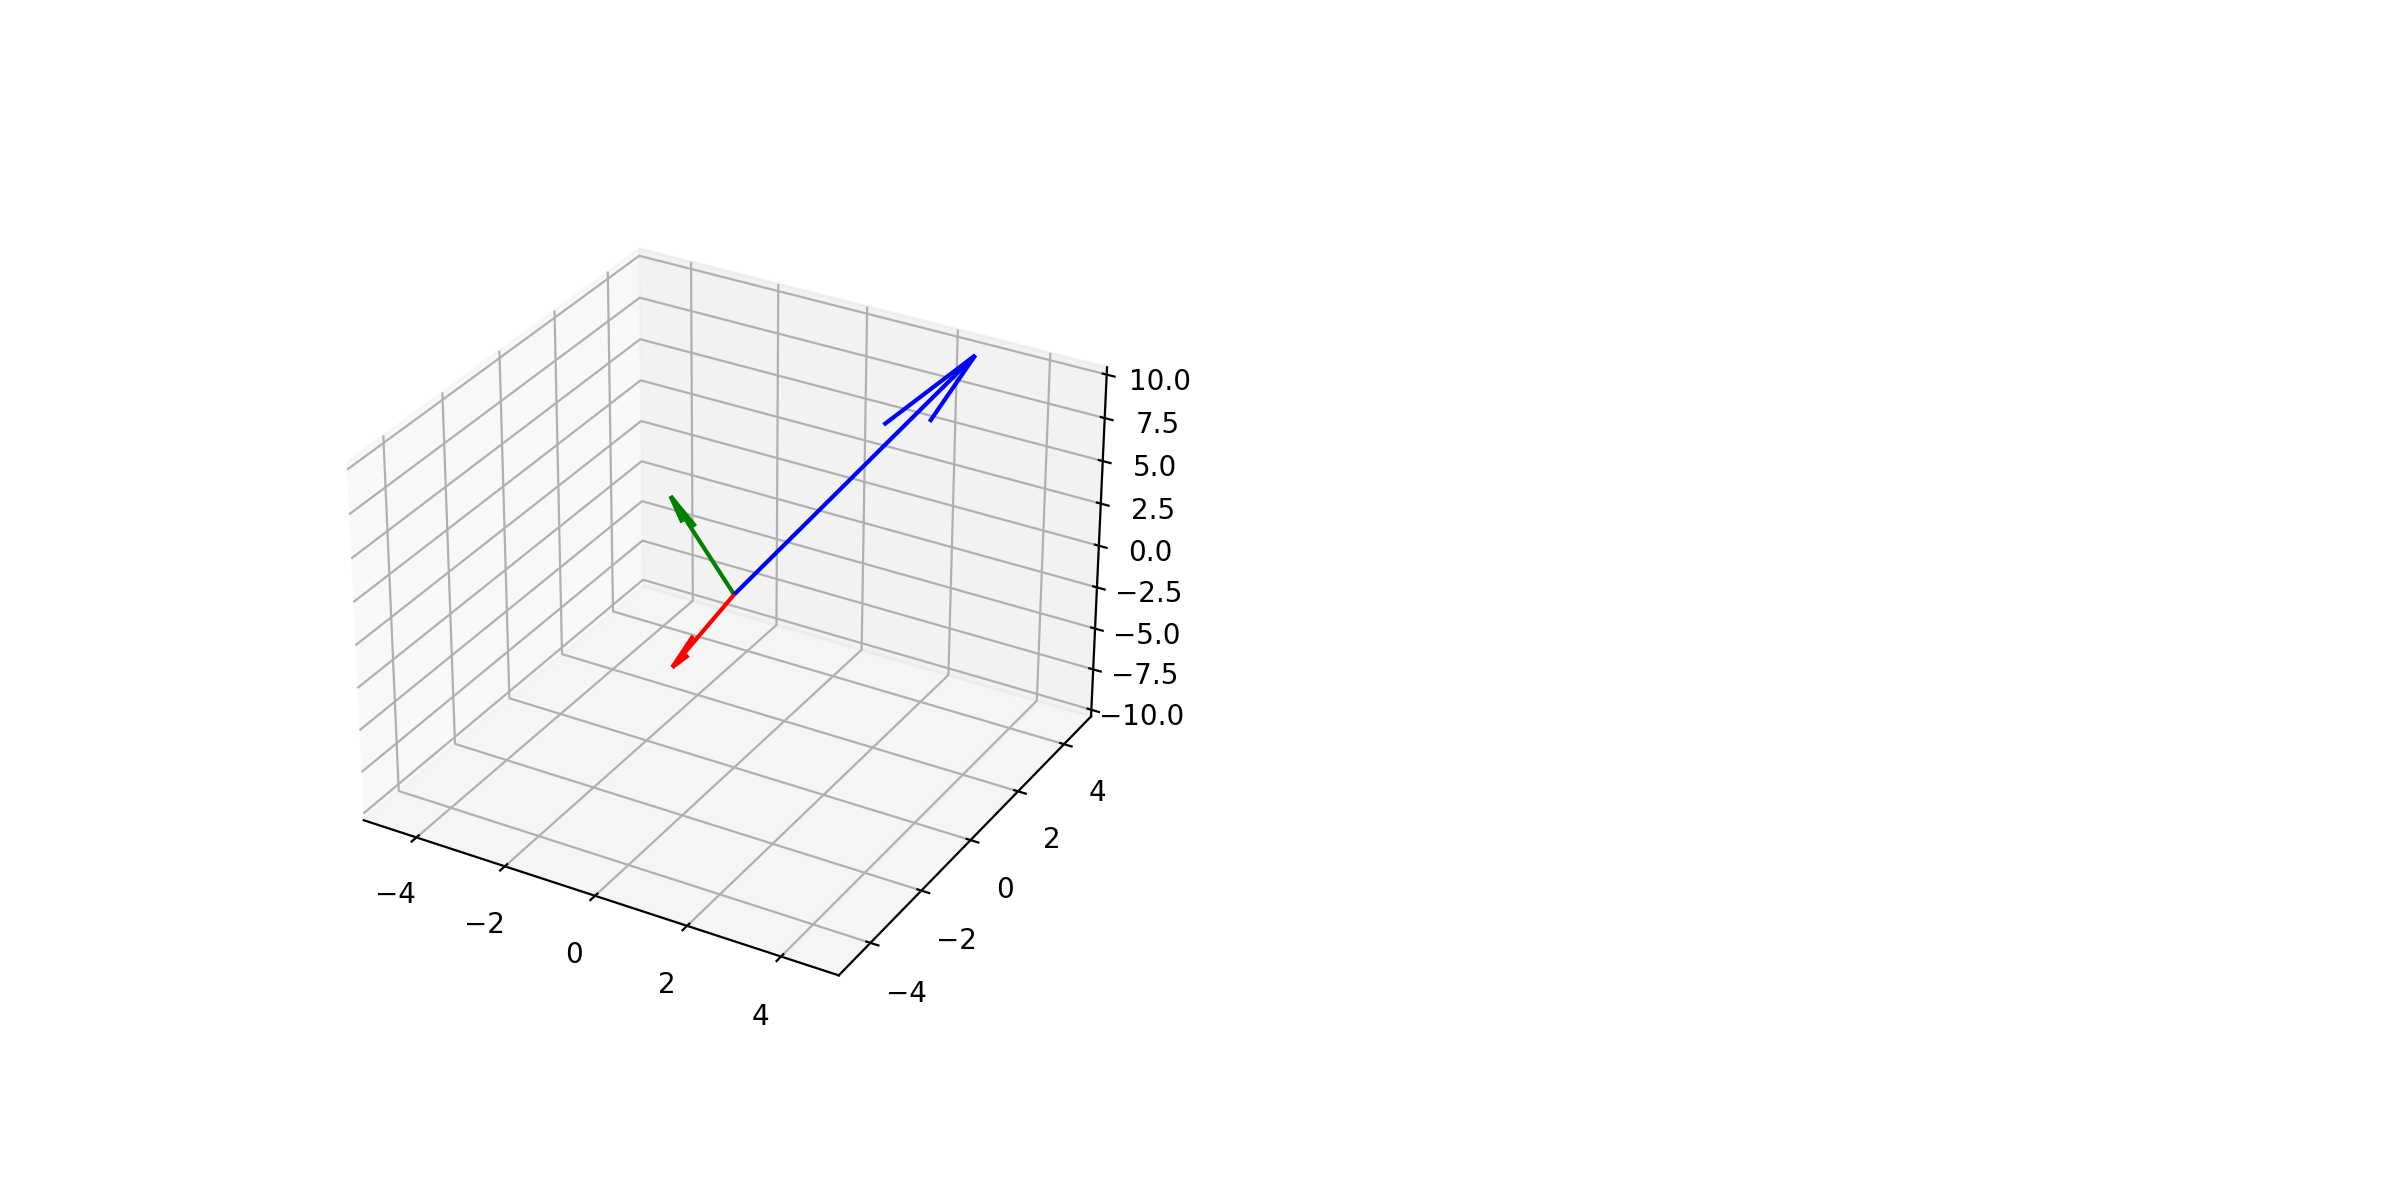

In [2]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(8,), color='blue', length=1)

plt.show()


<IPython.core.display.Javascript object>


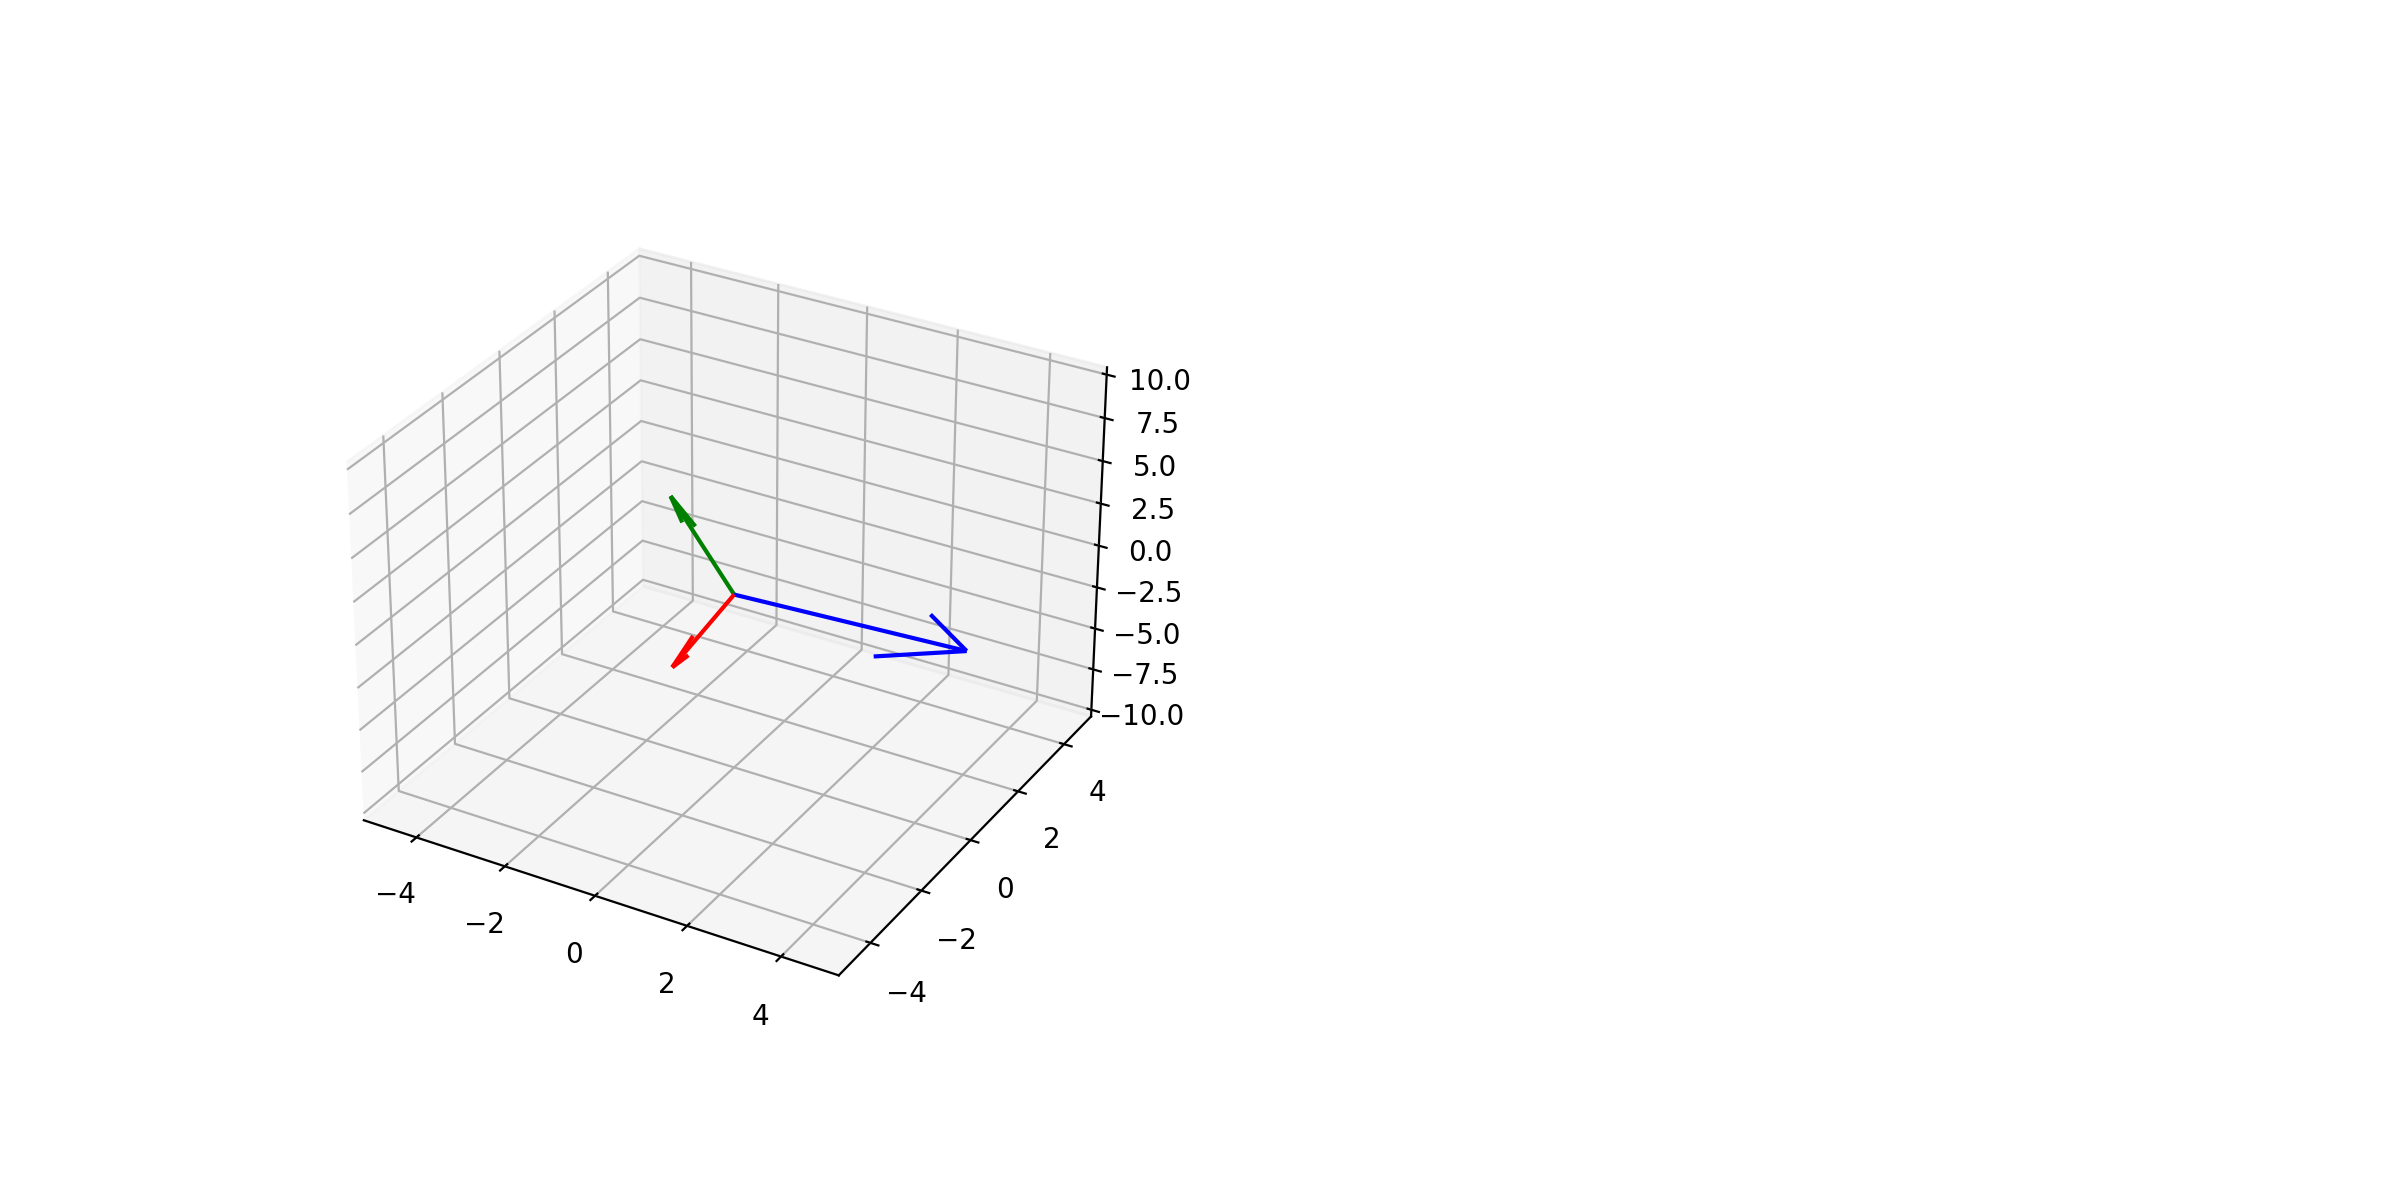

In [3]:

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(121, projection='3d')



ax.set_xlim(-5,5)
ax.set_ylim(-5,5)
ax.set_zlim(-10,10)
ax.quiver((0,),(0,),(0,),(1,),(-4,),(2,), color='red', length=1)
ax.quiver((0,),(0,),(0,),(-2,),(1,),(3,), color='green', length=1)
ax.quiver((0,),(0,),(0,),(2,),(6,),(-10,), color='blue', length=1)

plt.show()


- the invertable matrix has rank 3
- the non-invertable matrix has rank 2

### Fact: 

The rank of a matrix equals the number of pivots in its row echelon form, which is equal to the number of pivots in its reduced row echelon form.

- rank-3 matrix:

$$
\begin{aligned}
A &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{bmatrix}
\end{aligned}
$$

- row echelon form:

$$
\left[\begin{array}{r}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & 8
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & 4
\end{array}\right]\\
\left[\begin{array}{r}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 28
\end{array}\right]\\
$$

The row echelon form has 3 pivots, so $A$ has rank 3.

$$
\left[\begin{array}{r}
1 & -4 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & -7 &0\\
0 & 0 & 28
\end{array}\right]\\
\left[\begin{array}{r}
1 & 0 & 0\\
0 & 1 &0\\
0 & 0 & 1
\end{array}\right]\\
$$

The reduced row echolon form also has 3 pivots.
(For an invertable matrix, the reduced row echelon form is always the identity matrix.)

- rank-2 matrix

$$
\begin{aligned}
B &= 
\begin{bmatrix}
1 & -4 & 2\\
-2 & 1 & 3\\
2 & 6 & -10
\end{bmatrix}\\[1em]
\end{aligned}
$$

- row-echelon form

$$
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 14 & -14
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & -4 & 2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The row echelon form has two pivots, hence $B$ has rank 2.


- reduced row echelon form


$$
\begin{bmatrix}
1 & 0 & -2\\
0 & -7 & 7\\
0 & 0 & 0
\end{bmatrix}\\[1em]
\begin{bmatrix}
1 & 0 & -2\\
0 & 1 & -1\\
0 & 0 & 0
\end{bmatrix}\\[1em]
$$

The reduced row echelon form also has 2 pivots.

## Dimensionality of a vector space

### Linear independence of vectors

- a vector $\mathbf b$ is independent from a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ if and only if there are no real numbers $x_1,\ldots,x_n$ such that

$$
x_1\mathbf a_1 + \cdots + x_n\mathbf a_n = \mathbf b
$$

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is linearly independent if and only if each $\mathbf a_i$ is linearly independent of the other vectors $\mathbf a_1,\ldots, \mathbf a_{i-1},\mathbf a_{i+1}, \ldots \mathbf a_n$.

Equivalently, the column vectors of a matrix $A$ are linearly independent if and only if the linear system

$$
A\mathbf x = \mathbf 0
$$

has as its only solution $\mathbf x = \mathbf 0$.

### Basis of a vector space

- the span of a set of vectors $\mathbf a_1,\ldots, \mathbf a_n$ is the set of their linear combinations, i.e., the set

$$
    \{x_1\mathbf a_1 + \cdots x_n\mathbf a_n|x_1,\ldots, x_n \in \mathbb R\}
$$

- the span of set of vectors is a vector space

- a set of vectors $\mathbf a_1, \ldots, \mathbf a_n$ is a **basis of a vector space $S$** if and only if
    - $\mathbf a_1, \ldots, \mathbf a_n$ are linearly independent, and
    - the span of $\mathbf a_1, \ldots, \mathbf a_n$ is $S$.

### Theorem

If the columns of $A$ and the columns of $B$ are both a basis for some vector space $S$, then $A$ and $B$ have the same number of columns.

#### Proof

Let $A$ be an $m\times n$ matrix and $B$ and $m\times k$ matrix. Suppose $k<n$

Since $B$ is a basis of the column space of $A$, there must be a solution $\mathbf x_i$
$$
B\mathbf x_i = \mathbf a_i 
$$

for each column vector $\mathbf a_i$ of $A$. Let 

$$
X = \begin{bmatrix}
\vdots & \cdots & \vdots\\
\mathbf x_1 & \cdots & \mathbf x_n\\
\vdots & \cdots & \vdots\\
\end{bmatrix}
$$
i.e., $X$ is the matrix with $\mathbf x_1,\ldots, \mathbf x_n$ as column vectors. It has the format $k\times n$.

Then it holds:

$$
A = BX
$$

Since $k<n$, $X$ broader than high. Therefore its reduced row-echolon form must have free columns. Therefore there must be a non-zero solution $\mathbf y$ for 

$$
X\mathbf y = \mathbf 0
$$

It follows immediately that

$$
\begin{aligned}
X\mathbf y &= \mathbf 0\\
BX\mathbf y &= \mathbf 0\\
A\mathbf y &= \mathbf 0
\end{aligned}
$$

This is a contradiction, since by assumption, the columns of $A$ are linearly independent. 

$\dashv$

### Dimensions of a vector space

It follows that each basis of a vector space $S$ has the same number of vectors as elements. We call this number the **number of dimensions of $S$**.






# The four subspaces of a matrix

So far we have looked at two subspaces of an $n\times m$ matrix $A$:

- the **column space** $C(A)$
- the **nullspace** $N(A)$

The transpose $A^T$ also has these two subspaces:

- the column space $C(A^T)$ is called the **row space of $A$**
- the null space $N(A^T)$ is called the **left nullspace of $A$**

What can we say about the number of dimensions of these four subspaces?

- dimensions of $C(A) < n$
- dimensions of $C(A^T) < m$

We want to do bettern than that!

### Subspaces of reduced row echelon form matrices

Let us start with matrices in reduced row echelon form. Example:

$$
R = \left[\begin{array}{r}
1 & 2 & 0 & -2& 0\\
0 & 0 & 1 & -1& 3\\
0 & 0 & 0 & 0 & 0
\end{array}\right]
$$

- columns $\mathbf r_1$ an $\mathbf r_3$ are pivot columns
- columns $\mathbf r_2, \mathbf r_4$ and $\mathbf r_5$ are free columns

**Observation**: The pivot columns form a basis for $C(R)$.

$$
\begin{aligned}
\mathbf r_2 &= 2\mathbf r_1\\
\mathbf r_4 &= -2\mathbf r_1-\mathbf r_3\\
\mathbf r_5 &=  3\mathbf r_3
\end{aligned}
$$

Remember that the *rank of $R$* is the number of pivot columns. Hence the rank of $R$ is the number of dimensions of the column space. In the example, this number is 2.

(Here this is only demonstrated with a single example, but the argument works for any matrix in reduced row echelon form.)

There is one special solution to $R\mathbf x = \mathbf 0$ for each free column of $R$:

$$
\begin{aligned}
\mathbf x_1 &= \left[\begin{array}{r}-2\\1\\0\\0\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}2\\0\\1\\1\\0\end{array}\right]&
\mathbf x_2 &= \left[\begin{array}{r}0\\0\\-3\\0\\1\end{array}\right]
\end{aligned}
$$

With *sympy*:

In [5]:
R = Matrix([
    [1,2,0,-2,0],
    [0,0,1,-1,3],
    [0,0,0,0,0]
])
R

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

In [14]:
x1, x2, x3 = R.nullspace()

In [15]:
x1

Matrix([
[-2],
[ 1],
[ 0],
[ 0],
[ 0]])

In [16]:
x2

Matrix([
[2],
[0],
[1],
[1],
[0]])

In [17]:
x3

Matrix([
[ 0],
[ 0],
[-3],
[ 0],
[ 1]])

collecting them in a matrix:

$$
X = \left[\begin{array}{r}
-2 & 2 & 0\\
1 & 0 & 0\\
0 & 1 & -3\\
0 & 1 & 0\\
0 & 0 & 1
\end{array}\right]
$$

Now consider the system

$$
X\mathbf z = \mathbf 0
$$

Solving via substitution, this gives

$$
\begin{aligned}
-2z_1 + 2 z_2 &= 0\\
z_1 &= 0\\
z_2-3z_3 &= 0\\
z_2 &= 0\\
z_3 &= 0
\end{aligned}
$$

Therefore $\mathbf z = \mathbf 0$. The columns of $X$ are linearly independent, so they are a basis for $N(R)$.

There are as many columns in $X$ as there are free columns in $R$. If $r$ is the rank of $R$, there are $r$ pivot columns and $n-r$ free columns.

**The nullspace $N(R)$ has $n-r$ dimensions.**

## Dimensions of the row space of $R$

Now let us focus on the row space of $R$, which is the column space of 

$$
R^T = \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]
$$

By the construction of reduced row echelon forms, each row of $R$, i.e. each column of $R^T$, either contains a pivot or it is all-zero. By the same argument, each pivot row of $R^T$ contains a $1$ in one column and $0$ in all other columns, and all pivot columns are different.

Two oberservations follow from this:

- The pivot columns are linearly independent.
- The pivot columns form a basis of $C(R^T)$.

Since the number of pivot columns equals $r$, the rank of $R$, **the row space of $R$ has $r$ dimensions**.


When we bring $R^T$ in reduced row echelon form, pivot columns remain pivot columns:


$$
\begin{aligned}
R^T &= \left[\begin{array}{r}
1 & 0 & 0\\
2 & 0 & 0\\
0 & 1 & 0\\
-2 & -1 & 0\\
0 & 3 & 0
\end{array}\right]\\
\mathrm{rref}(R^T) &= \left[\begin{array}{r}
1 & 0 & 0\\
0 & 0 & 0\\
0 & 1 & 0\\
0 & 0 & 0\\
0 & 0 & 0
\end{array}\right]
\end{aligned}
$$

Hence the number of dimensions of $N(R^T)$, the left nullspace of $R$, is $m-r$.


### Generalizing to all matrices

We found that for an $m\times n$ matrix $R$ in reduced row echelon form with rank $r$:

- the row space of $R$ and the column space of $R$ both have $r$ dimensions
- the null space of $R$ has $n-r$ dimensions
- the left null space of $R$ has $m-r$ dimensions

Next it will be shown that this holds not just for matrices in reduced row echelon form, but for all matrices $m\times n$ matrices.

Let 

$$
A = \left[\begin{array}{r}
-1 & -2 & -2 & 4 & -6\\
-2 & -4 & - \frac{7}{2} & \frac{15}{2} & - \frac{21}{2}\\
2 & 4 & 3 & -7 & 9
\end{array}\right]
$$

When performing Gauss-Jordan elimination, we multiply $A$ repeatedly with matrices from the left.

These matrices have on of two forms:

- elimination matrix, i.e. a matrix with 
    - $1$s at the diagonal,
    - one non-zero entry off the diagonal, and
    - $0$s everywhere else
- an invertable diagonal matrix, i.e., a matrix with 
    - non-zero entries along the diagonal and 
    - $0$ everywhere else

In [85]:
A = Matrix([
    [-1, -2, -2, 4, -6],
    [-2, -4, -Rational(7,2), Rational(15,2), -Rational(21,2)],
    [2,4,3,-7,9]
])
A

Matrix([
[-1, -2,   -2,    4,    -6],
[-2, -4, -7/2, 15/2, -21/2],
[ 2,  4,    3,   -7,     9]])

In [89]:
E1 = Matrix([
    [1, 0, 0],
    [-2, 1, 0],
    [0, 0, 1]
])
E1

Matrix([
[ 1, 0, 0],
[-2, 1, 0],
[ 0, 0, 1]])

In [90]:
B = E1 * A
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 2,  4,   3,   -7,   9]])

In [91]:
E2 = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [2, 0, 1]
])
E2

Matrix([
[1, 0, 0],
[0, 1, 0],
[2, 0, 1]])

In [92]:
B = E2 * B
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,  -1,    1,  -3]])

In [97]:
E3 = Matrix([
    [1, 0, 0],
    [0, 1, 0],
    [0, 2, 1]
])
E3

Matrix([
[1, 0, 0],
[0, 1, 0],
[0, 2, 1]])

In [98]:
B = E3 * B
B

Matrix([
[-1, -2,  -2,    4,  -6],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,   0,    0,   0]])

In [99]:
E4 = Matrix([
    [1, 4, 0],
    [0, 1, 0],
    [0, 0, 1]
])
E4

Matrix([
[1, 4, 0],
[0, 1, 0],
[0, 0, 1]])

In [100]:
B = E4 * B
B

Matrix([
[-1, -2,   0,    2,   0],
[ 0,  0, 1/2, -1/2, 3/2],
[ 0,  0,   0,    0,   0]])

In [101]:
D = Matrix([
    [-1, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])
D

Matrix([
[-1, 0, 0],
[ 0, 2, 0],
[ 0, 0, 1]])

In [102]:
B = D * B
B

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

In [103]:
A.rref()[0]

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3],
[0, 0, 0,  0, 0]])

**Observations**:

- Elimination matrices and invertable diagonal matrices are invertable.
- Let $U$ be an invertable matrix. If a subset of the columns of $B$ form a basis of $C(B)$, than the corresponding columns of $UB$ form a basis for of $C(UB)$


The first statement should be obvious. To invert an elimination matrix, you only have to replace its non-zero off-diagonal entry with its negation.


In [104]:
E1

Matrix([
[ 1, 0, 0],
[-2, 1, 0],
[ 0, 0, 1]])

In [105]:
E1.inv()

Matrix([
[1, 0, 0],
[2, 1, 0],
[0, 0, 1]])

To invert an invertable diagonal matrix, you replace each diagonal entry with its inverse.

In [106]:
D

Matrix([
[-1, 0, 0],
[ 0, 2, 0],
[ 0, 0, 1]])

In [107]:
D.inv()

Matrix([
[-1,   0, 0],
[ 0, 1/2, 0],
[ 0,   0, 1]])

Now consider the second statement. Recall the running example

$$
A = \left[\begin{array}{r}
-1 & -2 & -2 & 4 & -6\\
-2 & -4 & - \frac{7}{2} & \frac{15}{2} & - \frac{21}{2}\\
2 & 4 & 3 & -7 & 9
\end{array}\right]
$$


Here $\{\mathbf a_1, \mathbf a_3\}$ form a basis for the column space.


In [117]:
D = A[:, [0,2]]
D

Matrix([
[-1,   -2],
[-2, -7/2],
[ 2,    3]])

In [118]:
D.solve(A)

Matrix([
[1, 2, 0, -2, 0],
[0, 0, 1, -1, 3]])

In [119]:
D.solve(zeros(2))

NonInvertibleMatrixError: Matrix det == 0; not invertible.

We get from $A$ to $\begin{bmatrix}\mathbf a_1, \mathbf a_3\end{bmatrix}$ by multiplying $A$ with

$$
\begin{aligned}
W &= \begin{bmatrix}
1 & 0\\
0 & 0\\
0 & 1\\
0 & 0\\
0 & 0
\end{bmatrix}\\
AW &= D
\end{aligned}
$$

In general, $W$ is an $n\times k$ matrix, $k\leq n$, with exactly one 1 per column. Let us call such matrices *subset matrices*.

No let us assume:

- $U$ is invertable
- the columns of $BW$ form a basis for $C(B)$

We need to show that $UBW$ form a basis for $C(UB)$.

First we need to show that the columns of $UBW$ are linearly independent, i.e., $\mathbf 0$ is the only solution for

$$
UBW\mathbf x = \mathbf 0
$$

Suppose it is otherwise, i.e, $\mathbf x \neq \mathbf 0$.

Since $U$ is invertable:

$$
\begin{aligned}
U^{-1}UBW\mathbf x &= \mathbf 0\\
BW\mathbf x &= \mathbf 0
\end{aligned}
$$

This contradicts the assumption that $BW$ is a basis for $C(B)$.

By assumption, $BW$ is a basis for $C(B)$. This means that each column vector of $B$ is a linear combination of the column vectors of $BW$. This amounts to saying that there is a matrix $X$ such that

$$
BWX = B
$$

We need to show that $UBW$ is a basis for $UB$, i.e., that there is a matrix $Y$ with

$$
UBWY = UB
$$
For $Y=X$, this follows directly from the assumptions.

Taking everything together, it follows that **the columns of $A$ with the same indices as the pivot columns of rref($A$)** form a basis of $C(A)$.

Therefore $C(A)$ has the same number of dimensions as $C(\mathrm{rref}(A))$, which equals the rank of $A$.

Furthermore, if $U$ is invertable, $U^T$ is also invertable. Therefore, applying Gauss-Jordan elimination does not change the dimensionality of the row space either. Since matrices in reduced row echelon form have the same number of dimensions for the row space and the column space, this also applies to all matrices.

Finally $U$ is invertable. If 

$$
A\mathbf x = \mathbf 0,
$$

then 
$$
\begin{aligned}
UA\mathbf x &= U\mathbf 0 = \mathbf 0
\end{aligned}
$$

If 
$$
UA\mathbf x = \mathbf 0,
$$

then

$$
\begin{aligned}
U^{-1}UA\mathbf x &=  U^{-1}\mathbf 0\\
A\mathbf x &= \mathbf 0
\end{aligned}
$$

This entails that $A$ and $\mathrm{rref}(A)$ have the same nullspace, end therefore the same number of dimensions of their nullspaces.


### Summary

Let $A$ be an $m\times n$ matrix.

- The column space $C(A)$ and the row space $C(A^T)$ both have dimension $r$ (the rank of $A$).
- The nullspace $N(A)$ has dimension $n-r$.
- The left nullspace $N(A^T)$ has dimension $m-r$.